In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

In [232]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from flask import Flask, jsonify
from sqlalchemy import and_
from sqlalchemy.sql import text

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [10]:
measurement = Base.classes.measurement

In [11]:
station = Base.classes.station

In [12]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [13]:
engine.execute("SELECT * FROM station LIMIT 5").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [14]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [280]:
session = Session(engine)

In [281]:
df = pd.DataFrame(session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all())

In [282]:
df

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [283]:
df.sort_values("date")

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2221,2017-08-23,0.08
2219,2017-08-23,0.00
2220,2017-08-23,0.00


In [284]:
df.set_index('date')

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


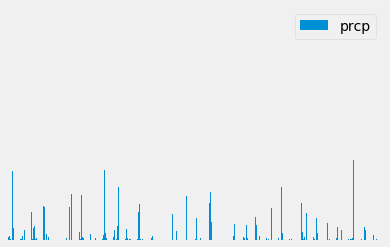

In [186]:
df.plot(kind='bar',x='date',y='prcp')
plt.axis('off')
plt.show()
#FIX SIZING

In [22]:
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [42]:
rows = session.query(station).count()
rows

9

In [288]:
tobs = session.query(func.count(measurement.tobs), measurement.station).group_by(measurement.station).all()
tobs

[(1979, 'USC00511918'),
 (2709, 'USC00513117'),
 (2202, 'USC00514830'),
 (2612, 'USC00516128'),
 (1372, 'USC00517948'),
 (511, 'USC00518838'),
 (2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2669, 'USC00519523')]

In [183]:
sorted(tobs, key=None, reverse=True)

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [187]:
max_tobs = max(tobs)
max_tobs

(2772, 'USC00519281')

In [189]:
max_station = max_tobs[1]
max_station

'USC00519281'

In [238]:
measure = pd.DataFrame(session.query(measurement.tobs, measurement.date, measurement.station).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all())

In [239]:
measure

,tobs,date,station
0,79.0,2016-08-24,USC00519397
1,76.0,2016-08-24,USC00513117
2,80.0,2016-08-24,USC00514830
3,78.0,2016-08-24,USC00517948
4,79.0,2016-08-24,USC00519523
...,...,...,...
2218,76.0,2017-08-22,USC00516128
2219,81.0,2017-08-23,USC00519397
2220,82.0,2017-08-23,USC00514830
2221,82.0,2017-08-23,USC00519523


In [347]:
measured = session.query(func.count(measurement.tobs), measurement.date, measurement.station).group_by(measurement.station).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()
measured

[(342, '2016-08-24', 'USC00513117'),
 (304, '2016-08-24', 'USC00514830'),
 (348, '2016-08-24', 'USC00516128'),
 (182, '2016-08-24', 'USC00517948'),
 (351, '2016-08-24', 'USC00519281'),
 (360, '2016-08-24', 'USC00519397'),
 (336, '2016-08-24', 'USC00519523')]

In [343]:
year_station = max(measured)
year_station

(360, '2016-08-24', 'USC00519397')

In [350]:
year_max = year_station[2]
year_max

'USC00519397'

In [314]:
max_filter = measure[station_filter]
max_filter

,tobs,date,station
5,77.0,2016-08-24,USC00519281
12,80.0,2016-08-25,USC00519281
19,80.0,2016-08-26,USC00519281
24,75.0,2016-08-27,USC00519281
30,73.0,2016-08-28,USC00519281
...,...,...,...
2186,77.0,2017-08-14,USC00519281
2191,77.0,2017-08-15,USC00519281
2195,76.0,2017-08-16,USC00519281
2199,76.0,2017-08-17,USC00519281


In [356]:
max_filter['month'] = pd.DatetimeIndex(max_filter['date']).month  
max_filter

C:\Users\Aimee\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tobs,date,station,month
5,77.0,2016-08-24,USC00519281,8
12,80.0,2016-08-25,USC00519281,8
19,80.0,2016-08-26,USC00519281,8
24,75.0,2016-08-27,USC00519281,8
30,73.0,2016-08-28,USC00519281,8
...,...,...,...,...
2186,77.0,2017-08-14,USC00519281,8
2191,77.0,2017-08-15,USC00519281,8
2195,76.0,2017-08-16,USC00519281,8
2199,76.0,2017-08-17,USC00519281,8


In [360]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Create the names for the bins
group_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [361]:
max_filter["full month"] = pd.cut(max_filter["month"], bins, labels=group_names)
max_filter

C:\Users\Aimee\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tobs,date,station,month,full month
5,77.0,2016-08-24,USC00519281,8,August
12,80.0,2016-08-25,USC00519281,8,August
19,80.0,2016-08-26,USC00519281,8,August
24,75.0,2016-08-27,USC00519281,8,August
30,73.0,2016-08-28,USC00519281,8,August
...,...,...,...,...,...
2186,77.0,2017-08-14,USC00519281,8,August
2191,77.0,2017-08-15,USC00519281,8,August
2195,76.0,2017-08-16,USC00519281,8,August
2199,76.0,2017-08-17,USC00519281,8,August


In [366]:
hist = max_filter[["full month", "tobs"]]
hist

,full month,tobs
5,August,77.0
12,August,80.0
19,August,80.0
24,August,75.0
30,August,73.0
...,...,...
2186,August,77.0
2191,August,77.0
2195,August,76.0
2199,August,76.0


In [373]:
hist.set_index("full month")

,tobs
full month,
August,77.0
August,80.0
August,80.0
August,75.0
August,73.0
...,...
August,77.0
August,77.0
August,76.0


TypeError: 77.0 is not a string

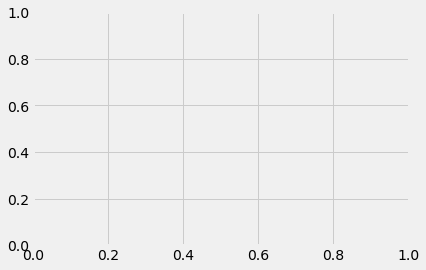

In [374]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(hist)
plt.xlabel('Month')
plt.ylabel('temperature observations')
plt.show()